## Combine midi and Pic

In [1]:
import os
import pretty_midi
import json
import numpy as np
import matplotlib.pyplot as plt
import random
import pygame
import midi_dataset.midi2img as Utils

os.environ['CUDA_VISIBLE_DEVICES'] = '6'

pygame 2.6.1 (SDL 2.28.4, Python 3.8.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# load data
path = "./midi_dataset/filtered_midi_imgs_10_000.npy"
midi_data = np.load(path, allow_pickle=True,)
print(f"Loaded {len(midi_data)} midi files from {path}")
print(f"Shape of midi data: {midi_data.shape}")


Loaded 10000 midi files from ./midi_dataset/filtered_midi_imgs_10_000.npy
Shape of midi data: (10000, 100, 100)


In [3]:
# load data
path = "./quickdraw_dataset/eye_100.npy"
img_data = np.load(path, allow_pickle=True,)
print(f"Loaded {len(img_data)} midi files from {path}")
print(f"Shape of img data: {midi_data.shape}")


Loaded 43501 midi files from ./quickdraw_dataset/eye_100.npy
Shape of img data: (10000, 100, 100)


In [4]:

def musical_augmentation(midi_data):
    new_notes = []
    for instrument in midi_data.instruments:
        for note in instrument.notes:
            choice = random.random()
            if choice < 0.4: 
                pass
            elif choice < 0.6:  # 上下八度变换
                if note.pitch+12 > 108:
                    continue
                new_note = pretty_midi.Note(
                    velocity=note.velocity,
                    pitch=note.pitch,
                    start=note.start,
                    end=note.end
                )
                new_notes.append(new_note)
                note.pitch += 12    
            elif choice < 0.8:  # 上下八度变换
                new_note = pretty_midi.Note(
                    velocity=note.velocity,
                    pitch=note.pitch,
                    start=note.start,
                    end=note.end
                )
                new_notes.append(new_note)
                note.pitch -= 12               
        instrument.notes.extend(new_notes)
    return midi_data

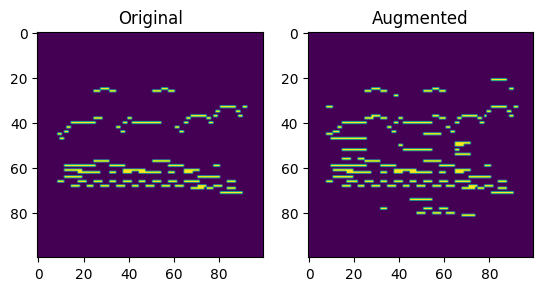

In [6]:

# test augmentation
midi_sample = midi_data[0]
plt.subplot(1, 2, 1)
plt.imshow(midi_sample)
plt.title("Original")
midi_sample = Utils.img2midi(midi_sample)
midi_sample = musical_augmentation(midi_sample)
midi_sample = Utils.midi2img(midi_sample)
plt.subplot(1, 2, 2)
plt.imshow(midi_sample)
plt.title("Augmented")
plt.show()


In [ ]:
# for i in range(100):
#     for j in range(100):
#         print(img_data[0][i][j])
# midi: 0.0 or 1.0
# img: 0 ~ 255

In [22]:
# find a closest image
def mask_midi_with_img(midi_sample, img_sample):
    # midi_data = torch.where(img_data == 0, midi_data, 0)
    # no torch, just numpy
    midi_sample = np.where(img_sample == 0, 0, midi_sample)
    return midi_sample

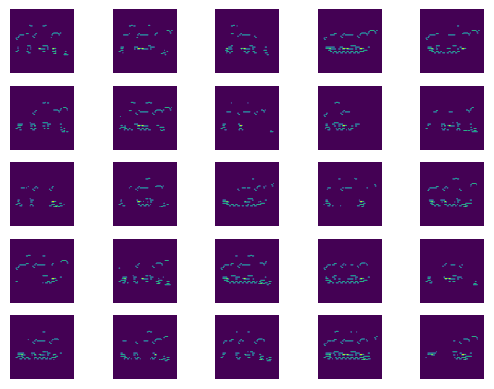

In [23]:
midi_sample = midi_data[0]
for i in range(25):
    img = img_data[i]
    masked_midi = mask_midi_with_img(midi_sample, img)
    # plt 10*10  = 100 
    plt.subplot(5, 5, i+1)
    plt.imshow(masked_midi)
    plt.axis('off')
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

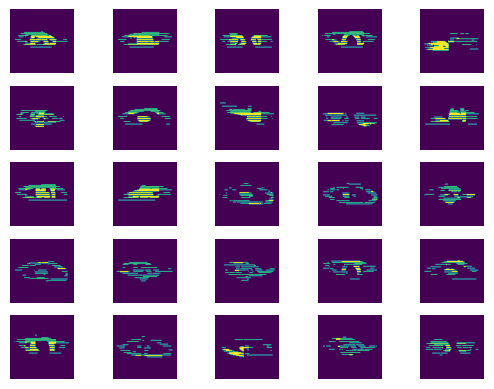

Loss: 182489
Loss: 185947
Loss: 193455
Loss: 197309
Loss: 203125
Loss: 203606
Loss: 207844
Loss: 208820
Loss: 209964
Loss: 210292
Loss: 211178
Loss: 211952
Loss: 212658
Loss: 212920
Loss: 214014
Loss: 214432
Loss: 215302
Loss: 215832
Loss: 215873
Loss: 216492
Loss: 216761
Loss: 216974
Loss: 216993
Loss: 217087
Loss: 217382


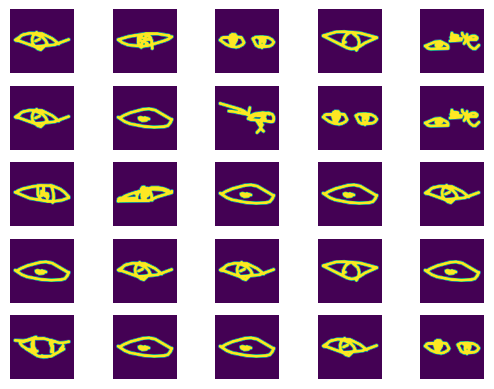

In [24]:
img_loss_pair = []
for i in range(500):
    midi_sample = midi_data[i]
    midi_sample = Utils.img2midi(midi_sample)
    midi_sample = musical_augmentation(midi_sample)
    midi_sample = Utils.midi2img(midi_sample)
    midi_sample = (midi_sample*255.0).astype(np.uint8)
    print(i)
    for j in range(500):
        img_sample = img_data[j]
        masked_midi = mask_midi_with_img(midi_sample, img_sample)
        loss = np.sum(img_sample - masked_midi)
        img_loss_pair.append((img_sample, midi_sample, masked_midi, loss))
        
        
# sort and  pick top 25
img_loss_pair.sort(key=lambda x: x[3])
print("Top 25 loss:")
for i in range(25):
    img_sample, midi_sample, masked_midi, loss = img_loss_pair[i]
    print(f"Loss: {loss}")
    plt.subplot(5, 5, i+1)
    plt.imshow(masked_midi)
    plt.axis('off')
plt.show()
for i in range(25):
    img_sample, midi_sample, masked_midi, loss = img_loss_pair[i]
    print(f"Loss: {loss}")
    plt.subplot(5, 5, i+1)
    plt.imshow(img_sample)
    plt.axis('off')
plt.show()

In [ ]:
for i in range(25):
    midi_file = img_loss_pair[i][1]/255.0
    midi_file = Utils.img2midi(midi_file)
    midi_file.write(f"masked_{i}.mid")

ValueError: data byte must be in range 0..127